In [26]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("titanic2.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df1 = pd.concat([df['pclass'], df['sex'], df['survived']], axis =1)
df1

,pclass,sex,survived
0,3,male,0
1,1,female,1
2,3,female,1
3,1,female,1
4,3,male,0
...,...,...,...
886,2,male,0
887,1,female,1
888,3,female,0
889,1,male,1


In [5]:
pd.crosstab(index=df1['sex'], columns=df1['survived'], margins= True )


survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [6]:
df = pd.read_csv("breast_cancer.csv")
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.shape

(569, 31)

In [12]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<Axes: xlabel='mean radius', ylabel='Count'>

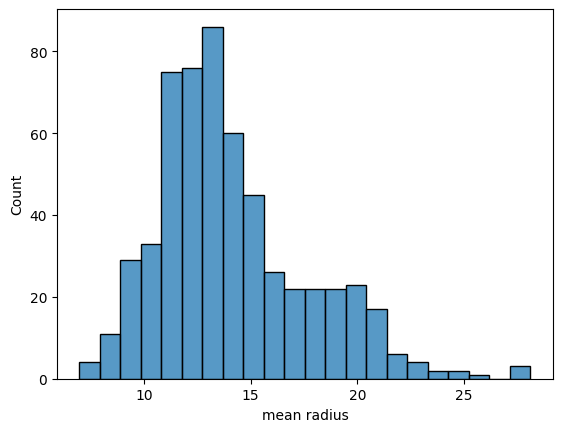

In [15]:
sns.histplot(data=df, x='mean radius')

<Axes: xlabel='mean texture', ylabel='Count'>

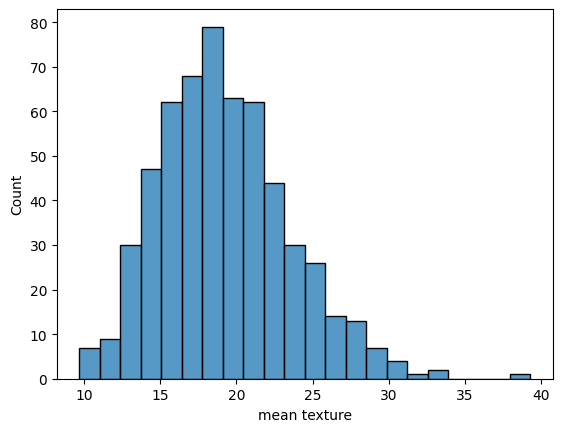

In [16]:
sns.histplot(data=df, x='mean texture')

<Axes: xlabel='mean perimeter', ylabel='Count'>

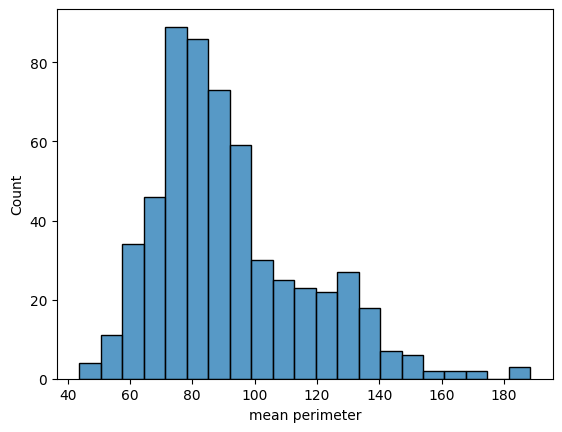

In [17]:
sns.histplot(data=df, x='mean perimeter')

<Axes: xlabel='mean area', ylabel='Count'>

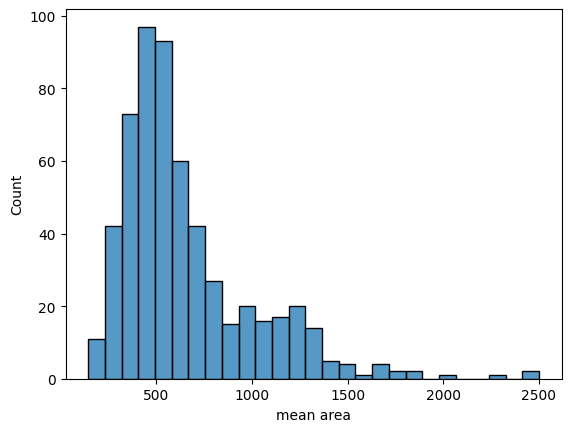

In [18]:
sns.histplot(data=df, x='mean area')

<Axes: xlabel='mean smoothness', ylabel='Count'>

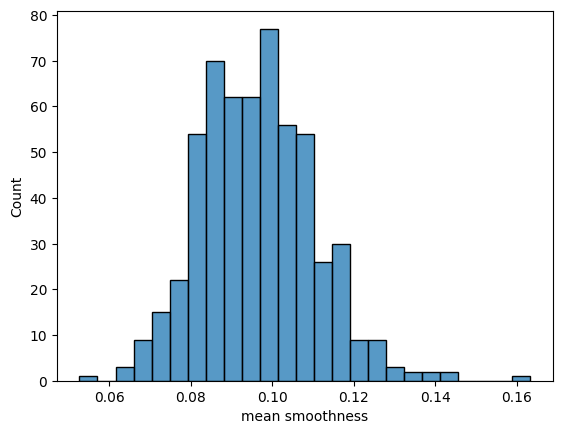

In [19]:
sns.histplot(data=df, x='mean smoothness')

<Axes: xlabel='mean compactness', ylabel='Count'>

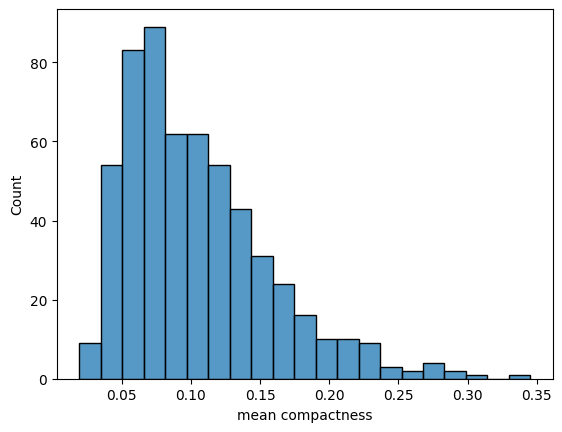

In [20]:
sns.histplot(data=df, x='mean compactness')

<Axes: xlabel='mean concavity', ylabel='Count'>

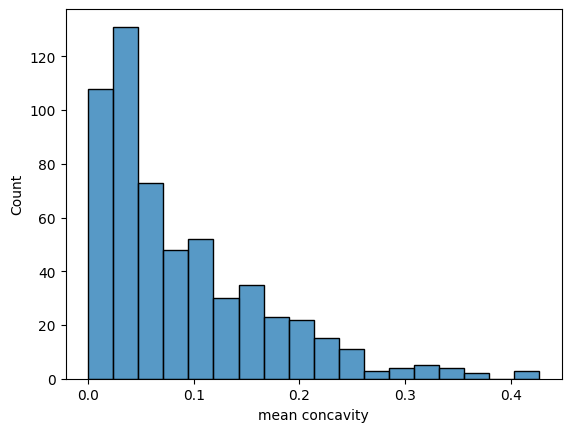

In [21]:
sns.histplot(data=df, x='mean concavity')

<Axes: xlabel='mean symmetry', ylabel='Count'>

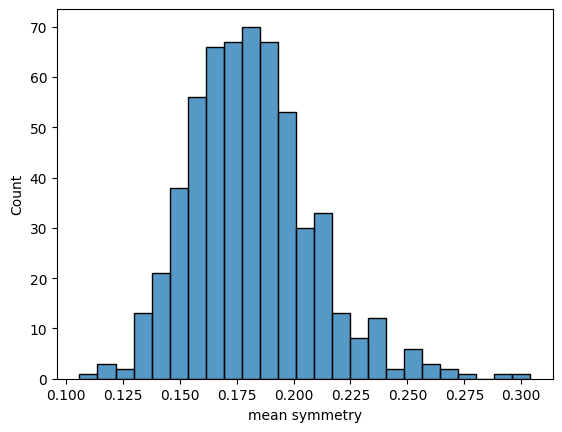

In [22]:
sns.histplot(data=df, x='mean symmetry')

<Axes: xlabel='worst area', ylabel='Count'>

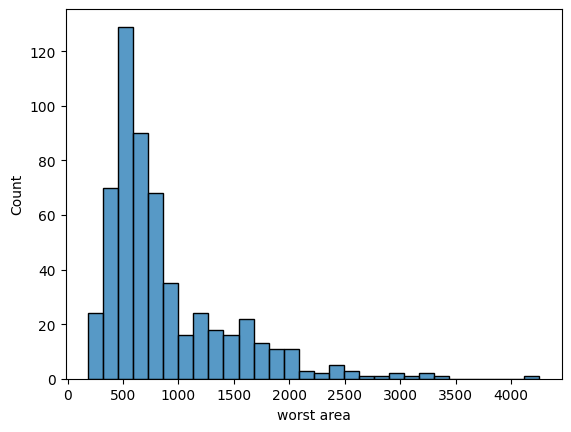

In [23]:
sns.histplot(data=df, x='worst area')

<Axes: xlabel='worst radius', ylabel='Count'>

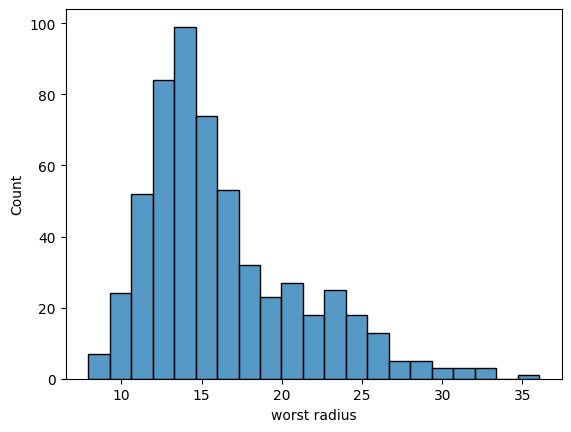

In [24]:
sns.histplot(data=df, x='worst radius')

<Axes: xlabel='worst texture', ylabel='Count'>

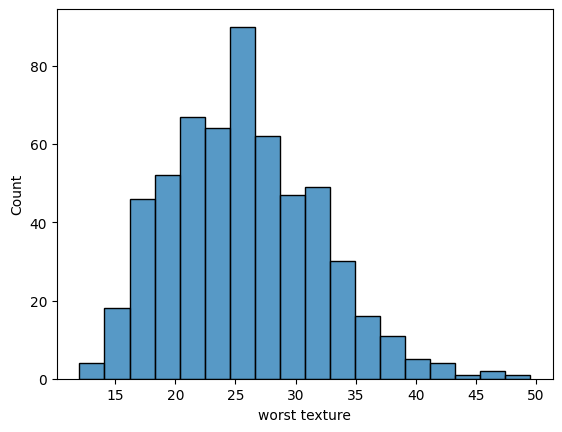

In [25]:
sns.histplot(data=df, x='worst texture')

In [27]:
x = df.drop('target', axis=1)
y= df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [28]:
model = GaussianNB()

In [29]:
model.fit(x_train, y_train)

GaussianNB()

In [30]:
y_pred = model.predict(x_test)
y_pred

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.])

In [32]:
y_test.values

array([0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.])

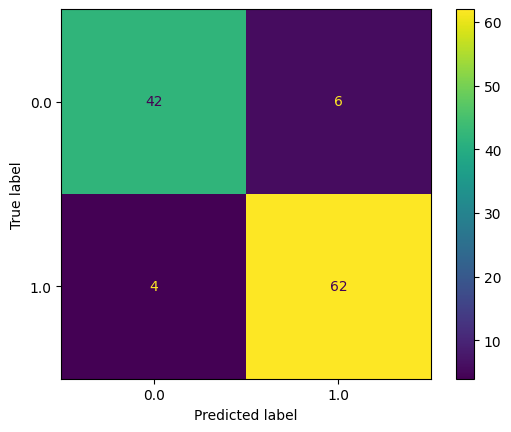

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [35]:
print(accuracy)

0.9122807017543859


In [36]:
print(f1)

0.9253731343283583


In [37]:
print(recall)

0.9393939393939394


In [38]:
print(precision)

0.9117647058823529
